# Nexa Well Street Columns High Resolution (30 x 30). Visualizing Receptive Fields and Data Clusters.
In this notebook we study how the receptive fields coming from the data for nexa wall street with high resolution looks like. 

In [1]:
import h5py
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
%matplotlib inline

from visualization.data_clustering import visualize_data_cluster_text_to_image_columns

## Mixed receptive fields

In [2]:
# First we load the file 
file_location = '../results_database/text_wall_street_columns_30_semi_constantNdata.hdf5'
file_location = '../results_database/text_wall_street_columns_30_Ndata20.hdf5'

# The first one is with constant number of features. The second one is whith Ndata 
# equal to 20 for all the examples. Better for visualization


max_lag = 6
run_name = '/test' + str(max_lag)
f = h5py.File(file_location, 'r')

Nside = 30

# Nexa parameters
Nspatial_clusters = max_lag
Ntime_clusters = 20
Nembedding = 3

parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]
cluster_to_index = nexa['cluster_to_index']

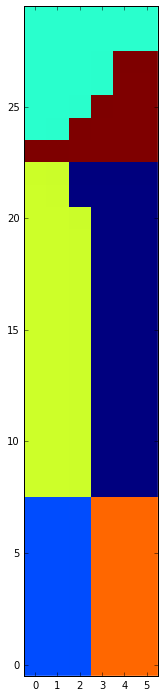

In [3]:
matrix = np.zeros((Nside, max_lag))

for cluster in cluster_to_index:
    
    cluster_indexes = cluster_to_index[str(cluster)]

    for index in cluster_indexes:
        first_index = index // max_lag
        second_index = index % max_lag
        matrix[first_index, second_index] = cluster

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.imshow(matrix, origin='lower', interpolation='none')

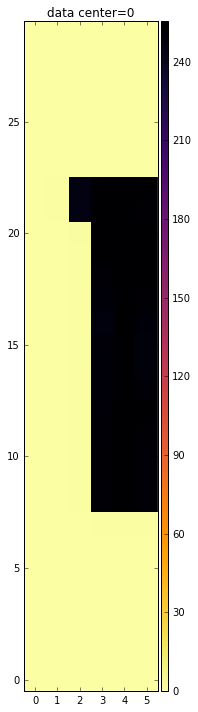

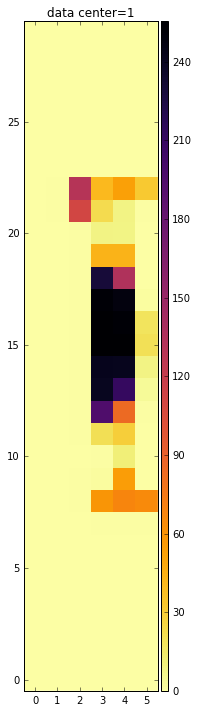

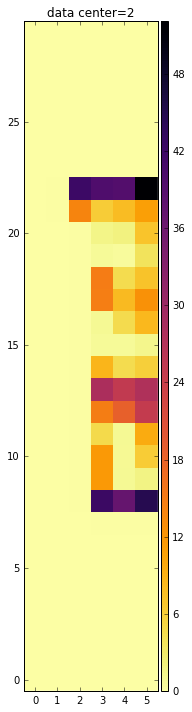

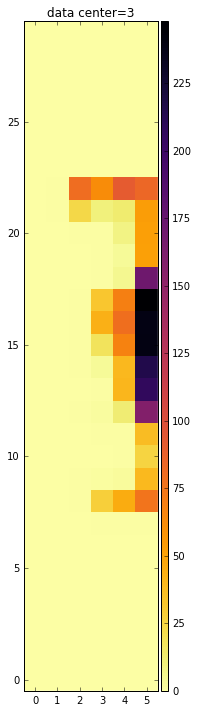

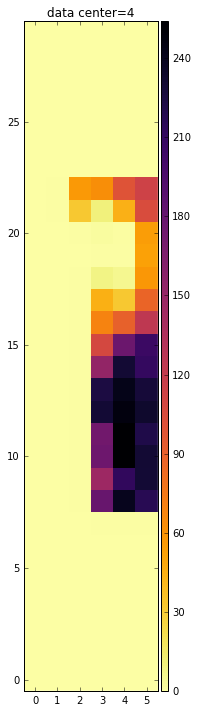

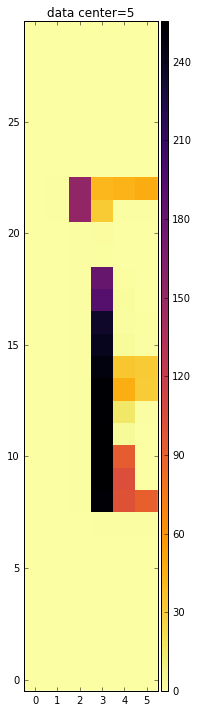

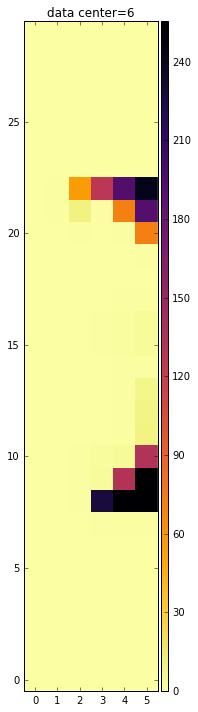

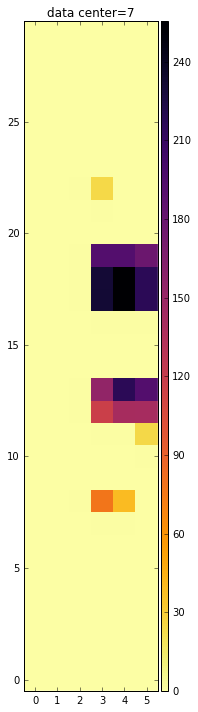

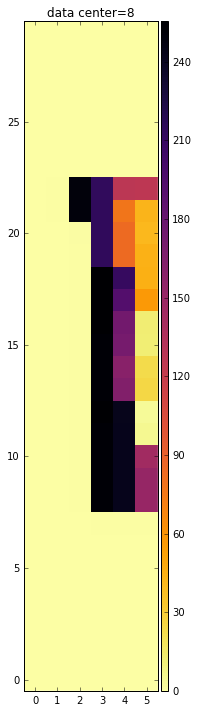

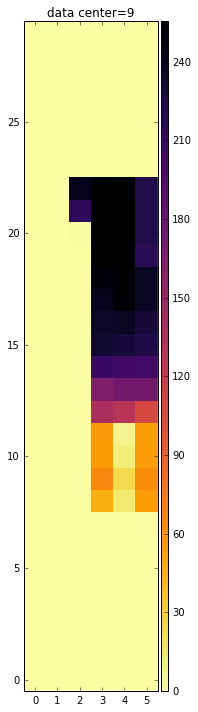

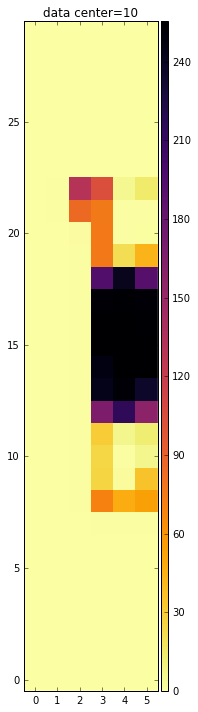

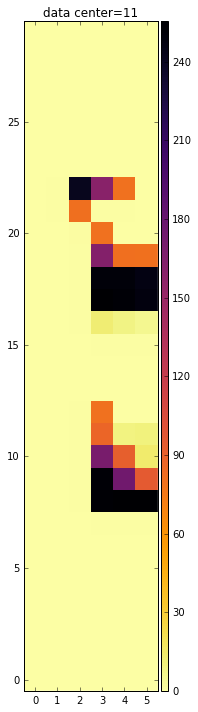

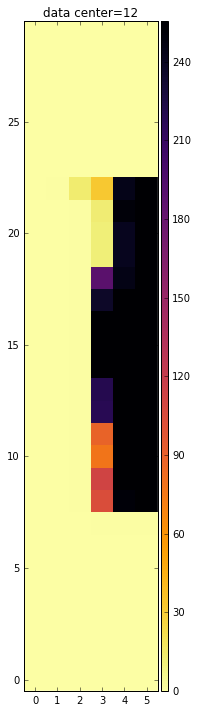

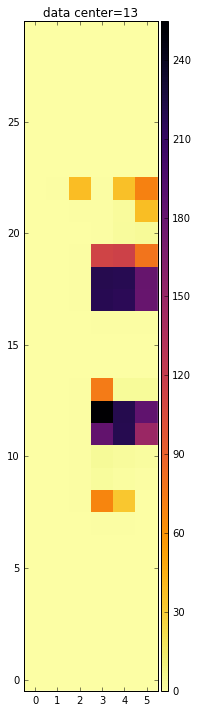

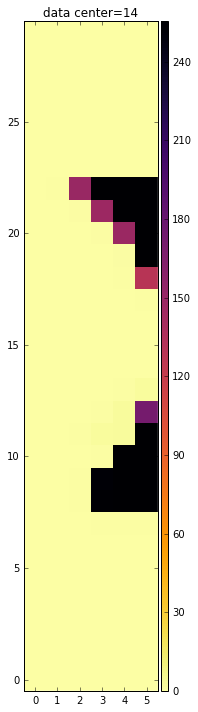

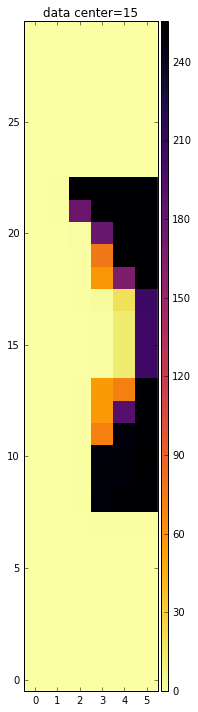

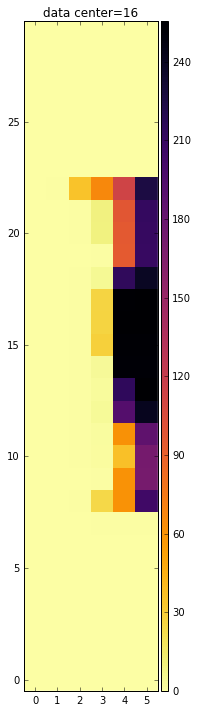

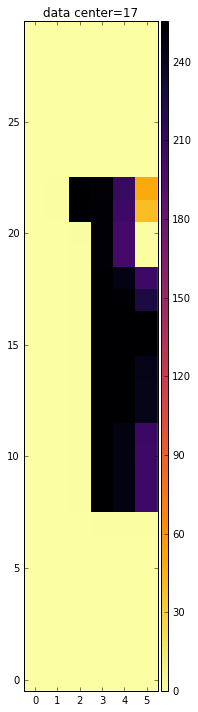

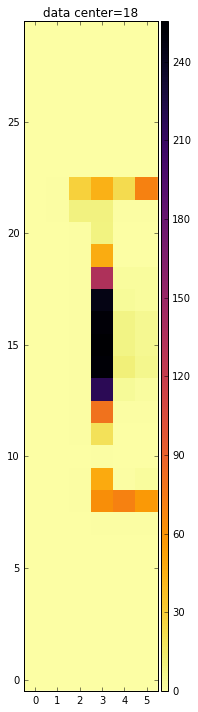

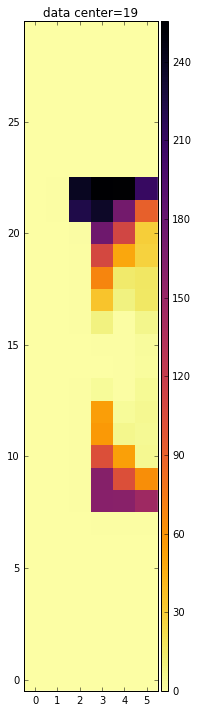

In [4]:
cluster = 0
for data_center in range(Ntime_clusters):
    fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True, Nside=Nside, Ncolumns=max_lag)

## Independent Receptive FIelds

In [6]:
# First we load the file 
file_location = '../results_database/text_wall_street_columns_30_semi_constantNdata.hdf5'
file_location = '../results_database/text_wall_street_columns_30.hdf5'
file_location = '../results_database/text_wall_street_columns_30_Ndata20.hdf5'

max_lag = 6
run_name = '/indep' + str(max_lag)
f = h5py.File(file_location, 'r')

Nside = 30
# Nexa parameters
Nspatial_clusters = max_lag
Ntime_clusters = 20
Nembedding = 3

parameters_string = '/' + str(Nspatial_clusters)
parameters_string += '-' + str(Ntime_clusters)
parameters_string += '-' + str(Nembedding)

nexa = f[run_name + parameters_string]
cluster_to_index = nexa['cluster_to_index']

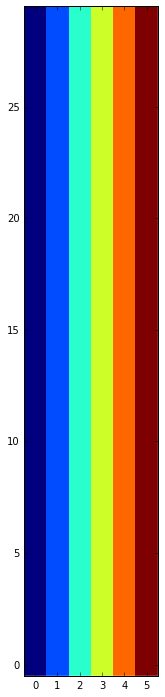

In [7]:
matrix = np.zeros((Nside, max_lag))

for cluster in cluster_to_index:
    
    cluster_indexes = cluster_to_index[str(cluster)]

    for index in cluster_indexes:
        first_index = index // max_lag
        second_index = index % max_lag
        matrix[first_index, second_index] = cluster

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.imshow(matrix, origin='lower', interpolation='none')

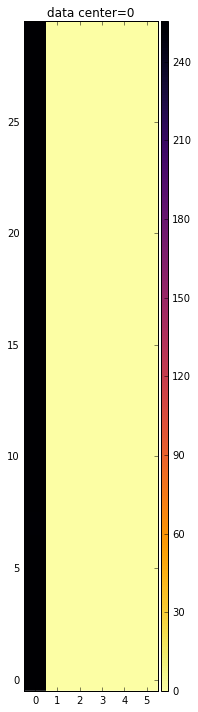

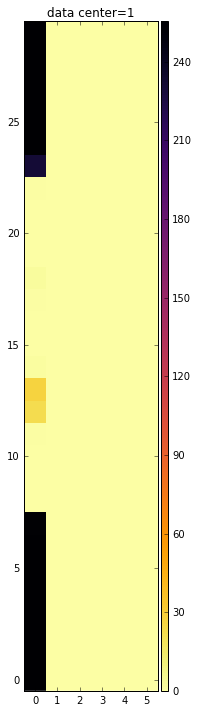

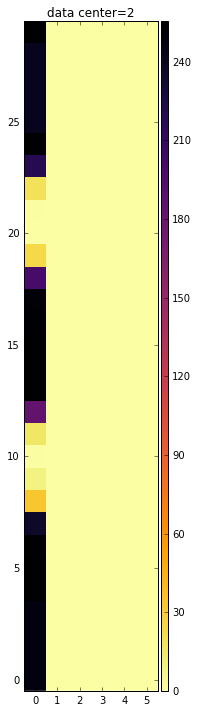

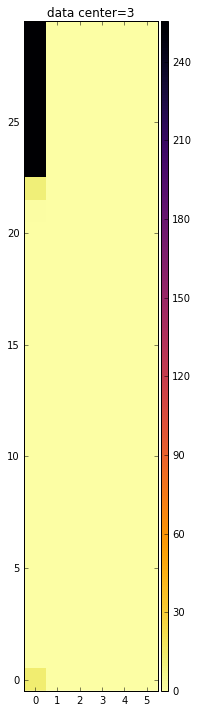

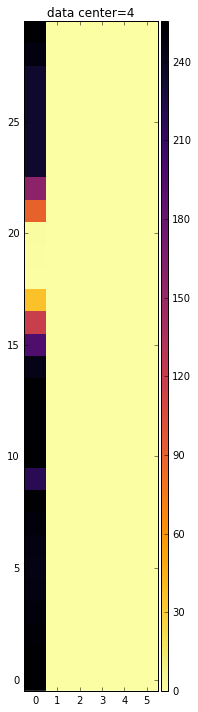

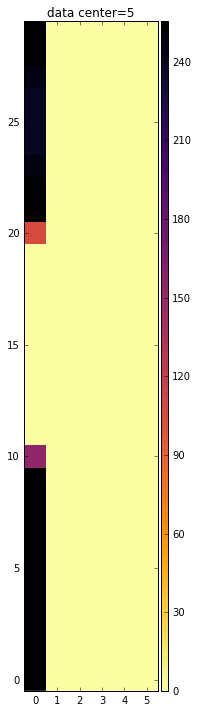

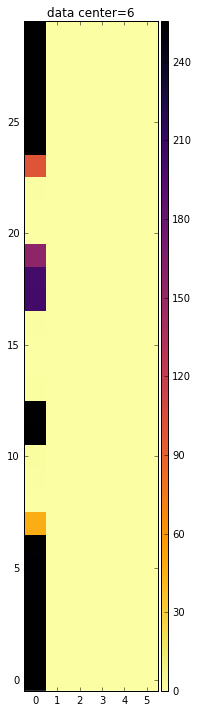

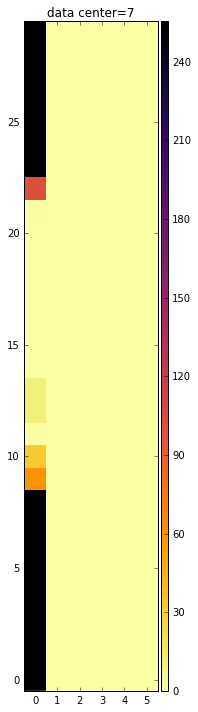

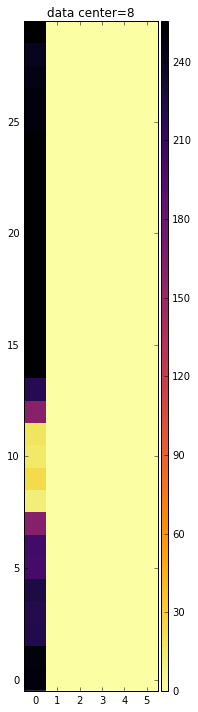

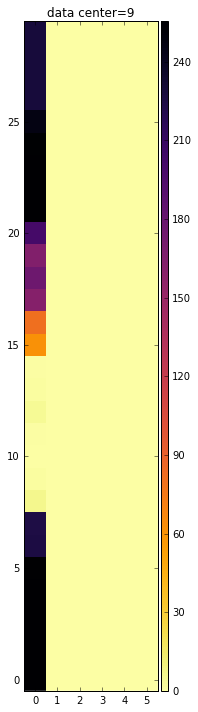

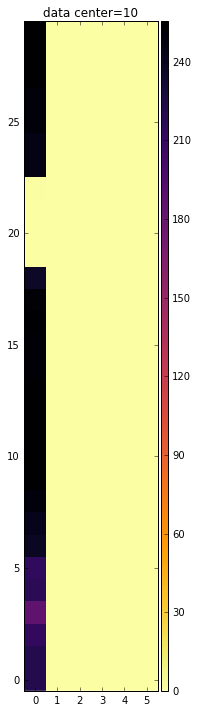

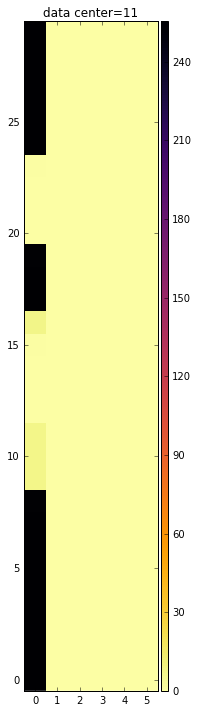

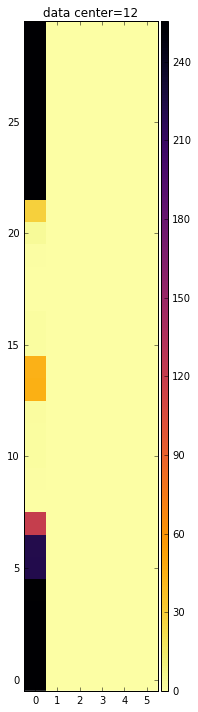

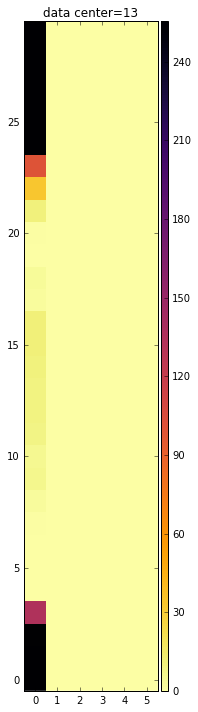

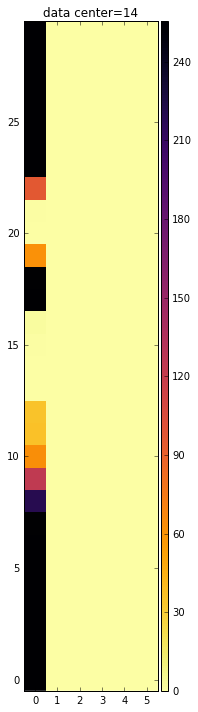

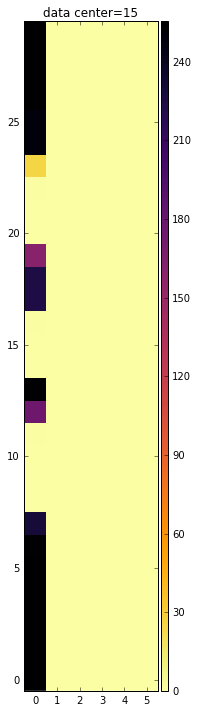

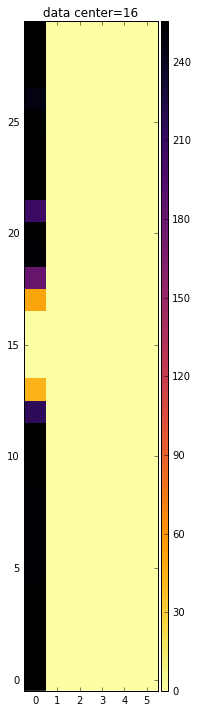

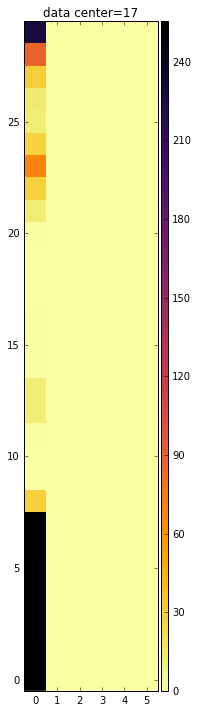

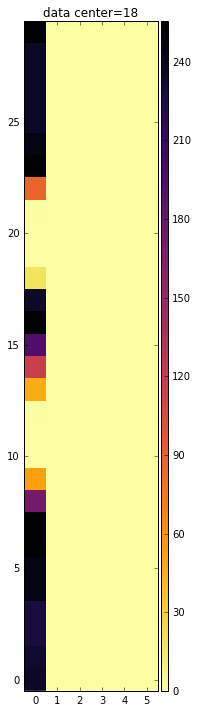

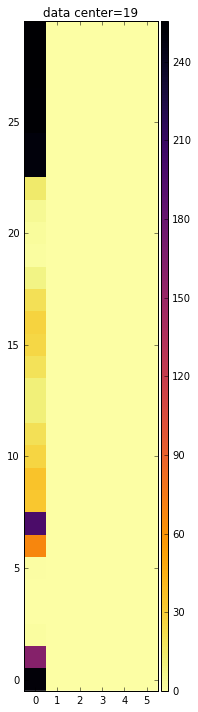

In [8]:
cluster = 0
for data_center in range(Ntime_clusters):
    fig = visualize_data_cluster_text_to_image_columns(nexa, f, run_name,
                                                       cluster, data_center, colorbar=True, Nside=Nside, Ncolumns=max_lag)